<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/CapstoneProjectWalmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Walmart**

**Problem Statements:**

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

**DataSet Information:**

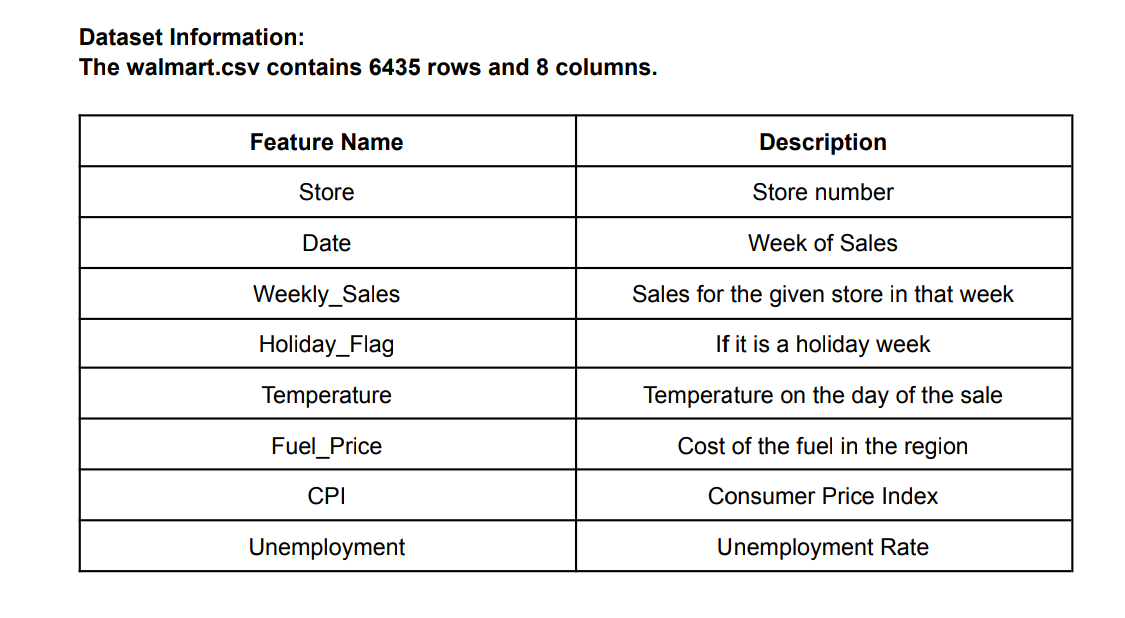

**Project Objectives:**

1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

## **Step 1: Data Pre-processing Steps**

Importing the Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the Dataset - Walmart DataSet.csv

In [3]:
# Importing the .csv dataset
df = pd.read_csv('/content/Walmart DataSet.csv')

## **Step 2: Data Cleaning and Preparation**

In [7]:
# Check for null in the file
df.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [8]:
# Check for the sum of the null
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [9]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## **Step 3: Dealing with Outliers**

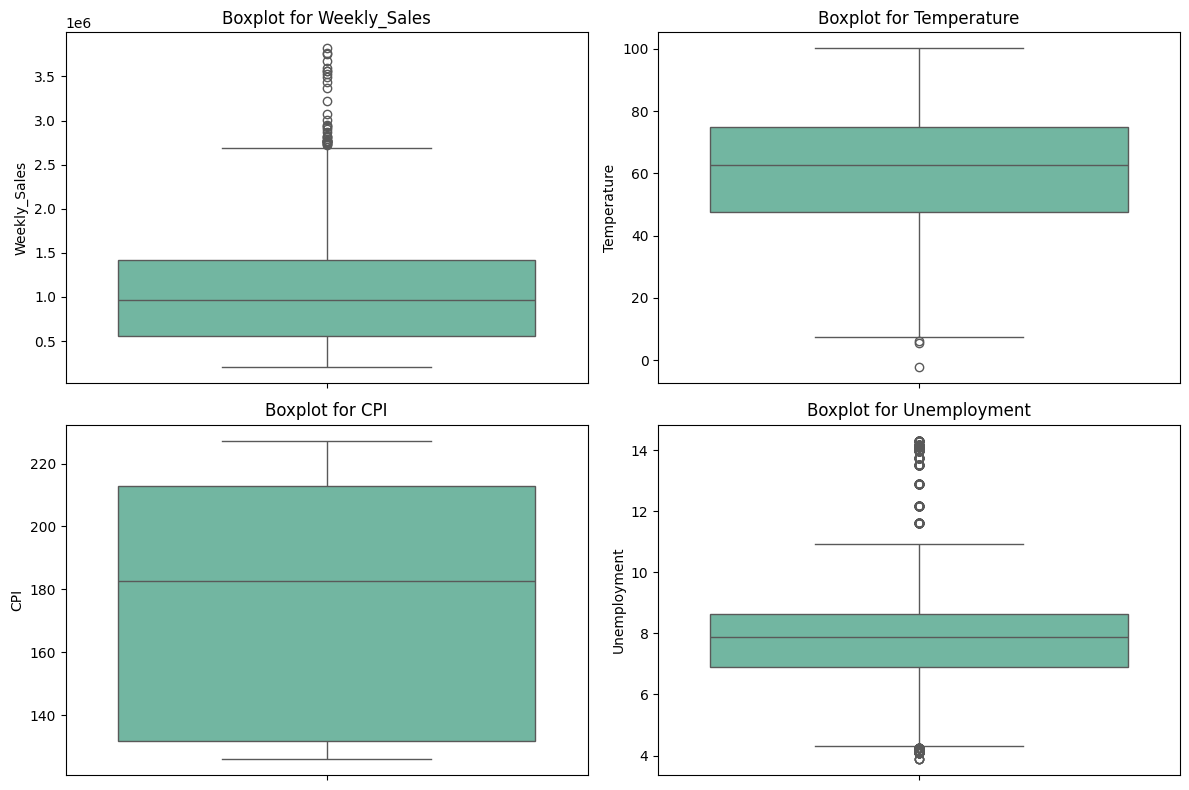

In [10]:
# List of columns to analyze
columns = ['Weekly_Sales', 'Temperature', 'CPI', 'Unemployment']

# Create boxplots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.boxplot(y=df[column], palette='Set2')
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

* **Boxplots** display the distribution of data based on quartiles.

In [11]:
# Detect outliers for each column
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier thresholds: Lower = {lower_bound}, Upper = {upper_bound}\n")


Column: Weekly_Sales
Number of outliers: 34
Outlier thresholds: Lower = -746862.7275, Upper = 2720371.4924999997

Column: Temperature
Number of outliers: 3
Outlier thresholds: Lower = 6.240000000000002, Upper = 116.16

Column: CPI
Number of outliers: 0
Outlier thresholds: Lower = 10.222559825000019, Upper = 334.255733625

Column: Unemployment
Number of outliers: 481
Outlier thresholds: Lower = 4.2945, Upper = 11.218499999999999



* **Interquartile Range** (IQR) method identifies outliers

In [12]:
# Function to cap or remove outliers
def handle_outliers(df, column, method='cap'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'cap':
        # Cap the outliers
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    elif method == 'remove':
        # Remove the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Handle outliers for each column
columns = ['Weekly_Sales', 'Temperature', 'CPI', 'Unemployment']
for column in columns:
    df = handle_outliers(df, column, method='cap')  # Change to 'remove' to drop outliers


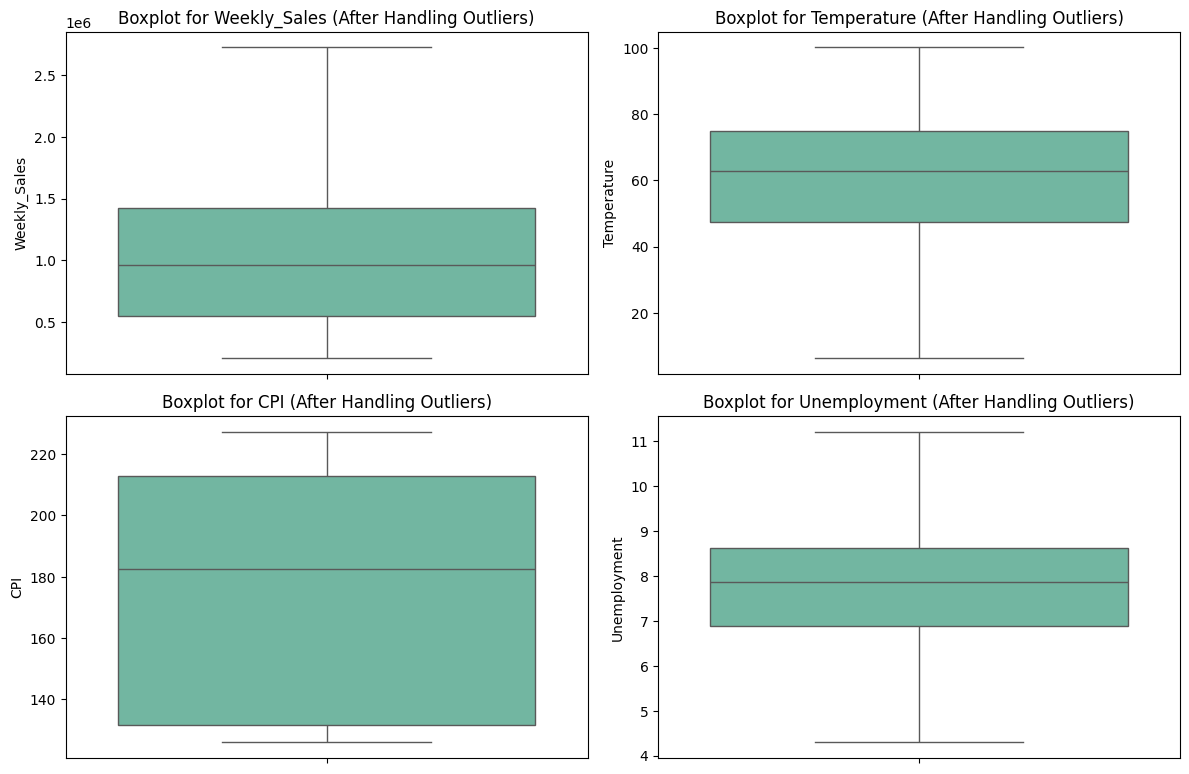

In [13]:
# Boxplots after handling outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column], palette='Set2')
    plt.title(f'Boxplot for {column} (After Handling Outliers)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


## **Step 4: Exploratory Data Analysis (EDA)**

**Descriptive Statistics of the Dataset**

In [4]:
# check the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Check the file description
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Load the head of the file
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**1. a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

In [14]:
# Load the scipy.stats library
from scipy.stats import pearsonr

# Correlation between Weekly Sales and Unemployment by Store
store_correlation = df.groupby('Store').apply(lambda x: pearsonr(x['Weekly_Sales'], x['Unemployment'])[0])
store_correlation = store_correlation.reset_index(name='Correlation')

# Stores suffering the most (negative correlation)
worst_stores = store_correlation[store_correlation['Correlation'] < -0.5]
print("Stores most affected by unemployment:\n", worst_stores)


Stores most affected by unemployment:
     Store  Correlation
43     44    -0.780076


**1. b. If the weekly sales show a seasonal trend, when and what could be the reason?**

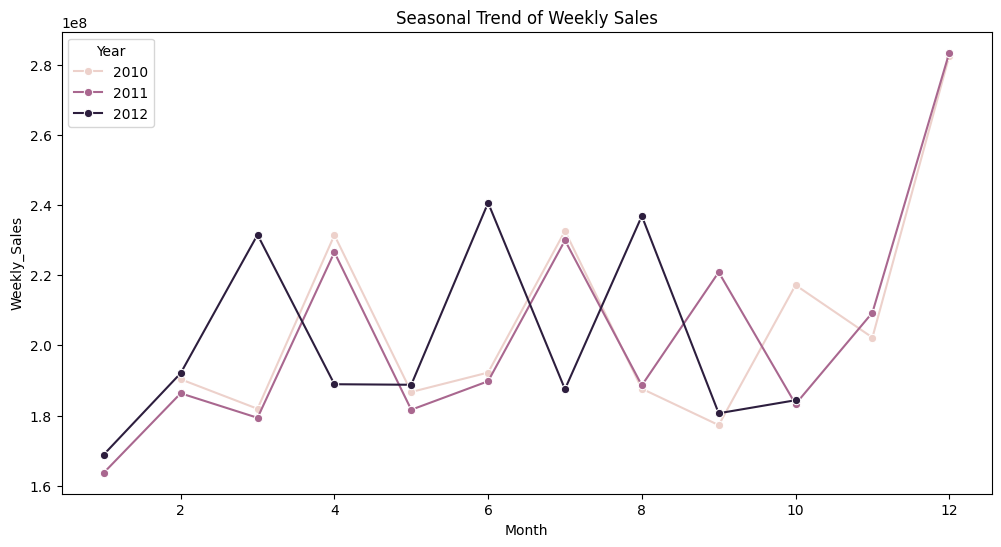

In [15]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Aggregate sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Plot seasonal trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title("Seasonal Trend of Weekly Sales")
plt.show()


**1. c. Does temperature affect the weekly sales in any manner?**

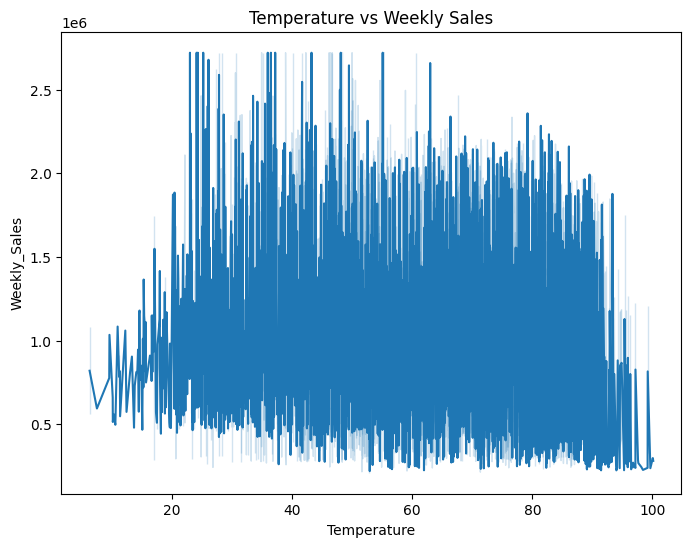

Correlation between Temperature and Weekly Sales: PearsonRResult(statistic=-0.06080827573480914, pvalue=1.0527360924486494e-06)


In [16]:
# Correlation between Temperature and Weekly Sales
# Line plot for temperature and weekly sales
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Temperature vs Weekly Sales")
plt.show()

# Correlation
temp_corr = pearsonr(df['Temperature'], df['Weekly_Sales'])
print("Correlation between Temperature and Weekly Sales:", temp_corr)


**1. d. How is the Consumer Price index affecting the weekly sales of various stores?**

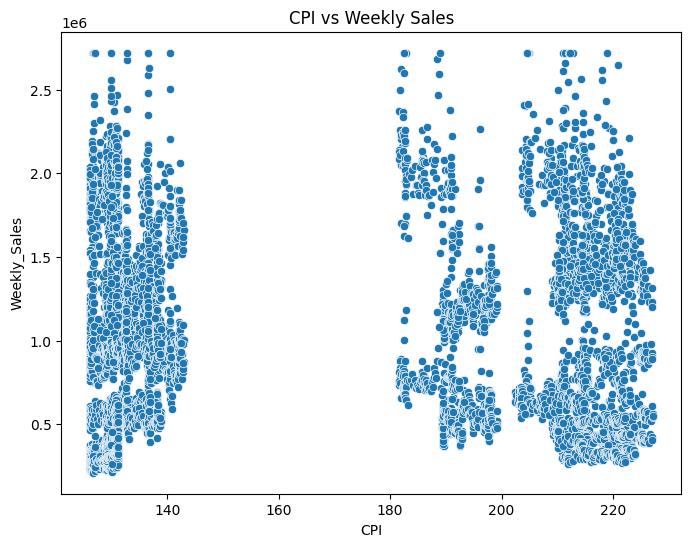

Correlation between CPI and Weekly Sales: PearsonRResult(statistic=-0.07262717217303126, pvalue=5.456674985482091e-09)


In [17]:
# Correlation between Consumer Price Index (CPI) and Weekly Sales
# Scatter plot for CPI and weekly sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title("CPI vs Weekly Sales")
plt.show()

# Correlation
cpi_corr = pearsonr(df['CPI'], df['Weekly_Sales'])
print("Correlation between CPI and Weekly Sales:", cpi_corr)


**1. e. Top performing stores according to the historical data.**

In [18]:
# Aggregate total sales by store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values(by = 'Weekly_Sales', ascending = False)

# Top performing stores
print("Top performing stores:\n", store_sales.head())

Top performing stores:
     Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08


**1. f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.**

In [19]:
# Worst performing store
worst_store = store_sales.iloc[-1]
best_store = store_sales.iloc[0]

print(f"Worst performing store:\n{worst_store}")
print(f"Difference between best and worst store: {best_store['Weekly_Sales'] - worst_store['Weekly_Sales']}")

Worst performing store:
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64
Difference between best and worst store: 261906113.29749998


**2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.**

## **Step 5: Predictive Modeling Techniques to forecast the sales**

In [25]:
# Load the Time Series Libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

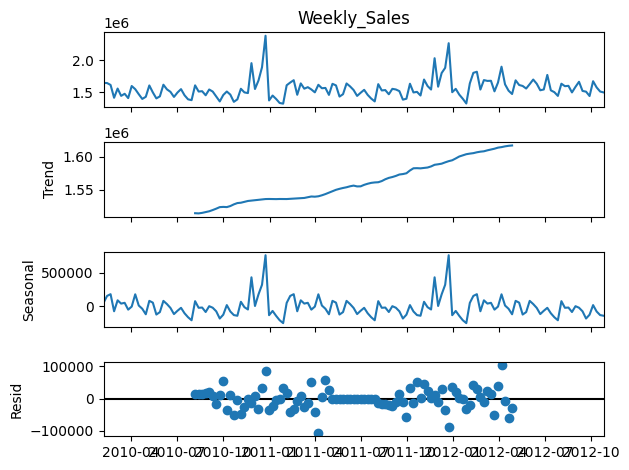

In [26]:
# Time series forecasting for a specific store
# Example: Store 1
store_id = 1  # Replace with the desired store ID
store_data = df[df['Store'] == store_id].sort_values(by='Date')
store_data.set_index('Date', inplace=True)

# Decompose time series
decomposition = seasonal_decompose(store_data['Weekly_Sales'], model='additive', period=52)
decomposition.plot()
plt.show()


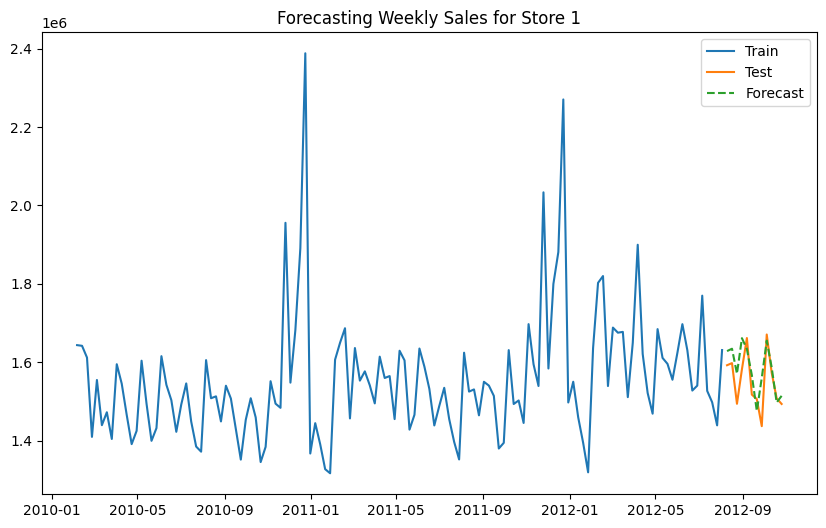

In [27]:
# Forecasting using Exponential Smoothing

# Train-test split
train = store_data['Weekly_Sales'][:-12]
test = store_data['Weekly_Sales'][-12:]

# Fit model
model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=52)
fit = model.fit()

# Forecasting the next 12 week
forecast = fit.forecast(12)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title(f"Forecasting Weekly Sales for Store {store_id}")
plt.show()
